<h1 style="color:red"><b>Disclaimer of Liability</b></h1>

**The material and information contained on this website is for general information, reference, and self-learning purposes only. You should not rely upon the material or information on the website as a basis for making any academic, business, legal or any other decisions. You should not copy any material or information on the website into any of your academic, business, legal or any other non-private usages. ZHANG Wengyu will not be responsible for any consequences due to your violations.**


Whilst ZHANG Wengyu endeavours to keep the information up to date and correct, ZHANG Wengyu makes no representations or warranties of any kind, express or implied about the completeness, accuracy, reliability, suitability or availability with respect to the website or the information, products, services or related graphics contained on the website for any purpose. Any reliance you place on such material is therefore strictly at your own risk.


ZHANG Wengyu will not be liable for any false, inaccurate, inappropriate or incomplete information presented on the website.


Although every effort is made to keep the website up and running smoothly, due to the nature of the Internet and the technology involved, ZHANG Wengyu takes no responsibility for and will not be liable for the website being temporarily unavailable due to technical issues (or otherwise) beyond its control or for any loss or damage suffered as a result of the use of or access to, or inability to use or access this website whatsoever.


Certain links in this website will lead to websites which are not under the control of ZHANG Wengyu. When you activate these you will leave ZHANG Wengyu's  website. ZHANG Wengyu has no control over and accepts no liability in respect of materials, products or services available on any website which is not under the control of ZHANG Wengyu.


To the extent not prohibited by law, in no circumstances shall ZHANG Wengyu be liable to you or any other third parties for any loss or damage (including, without limitation, damage for loss of business or loss of profits) arising directly or indirectly from your use of or inability to use, this site or any of the material contained in it.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import os

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori

import random

- `age`: Age of the patient
- `sex` - Sex of the patient
    - `1`
    - `0`
- `cp`: Chest pain type
    - `0` = Typical Angina
    - `1` = Atypical Angina
    - `2` = Non-anginal Pain
    - `3` = Asymptomatic
- `trtbps`: Resting blood pressure (in mm Hg)
- `chol`: Cholestoral in mg/dl fetched via BMI sensor
- `fbs`: (fasting blood sugar > 120 mg/dl)
    - `1` = True
    - `0` = False
- `restecg` - Resting electrocardiographic results
    - `0` = Normal
    - `1` = ST-T wave normality
    - `2` = Left ventricular hypertrophy
- `thalachh`: Maximum heart rate achieved
- `oldpeak`: Previous peak
- `slp`: Slope
    - `0`, `1`, `2`
- `caa`: Number of major vessels 
    - `0`, `1`, `2`, `3`, `4`
- `thall`: Thalium Stress Test result ~ (0,3)
- `exng`: Exercise induced angina
    - `1` = Yes
    - `0` = No
- `output`: Target variable
    - `1` = Heart disease
    - `0` = No heart disease

# 1. Data Input and Clean

In [5]:
df=pd.read_csv("./kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df.head()

# Only get sex=0
# df = df[df.sex==0]
# df = df[df.sex==1]

# Age group
# < 50
# df = df[df.age<50]

# 50-60
# df = df[(df.age>=50) & (df.age<=60)]

# > 60
# df = df[df.age>60]

# cp
# df = df[df.cp==0]
# df = df[df.cp!=0]

# thalachh
# df = df[df.thalachh<=150]
# df = df[df.thalachh>150]

# oldpeak
# df = df[df.oldpeak<=2.067]
# df = df[df.oldpeak>2.067]

# caa
# df = df[df.caa==0]
# df = df[df.caa!=0]

# thall
# df = df[df.thall==2]
# df = df[df.thall!=2]

# chol
# [125.562, 272.0]
# df = df[(df.chol>=125.562) & (df.chol<=272.0)]
# df = df[(df.chol<125.562) | (df.chol>272.0)]

# exng
# df = df[df.exng==0]
# df = df[df.exng!=0]

print('Number of records:',df.shape[0], '\nNumber of attributes:',df.shape[1])

# Check data type and null data
# df.info()

# Check null data
# df.isnull().sum()

# Check repeated data
print('Number of repeated data:',df.duplicated().sum())
print(df[df.duplicated()])

# split into category and numeric data
category_features=['sex', 'cp', 'fbs', 'restecg', 'slp', 'caa', 'thall', 'exng']
numeric_features=['age','trtbps','chol','thalachh','oldpeak']
c_f = []
n_f = []
# check if any features has been removed
for feature in category_features:
    if feature in df.columns:
        c_f.append(feature)


for feature in numeric_features:
    if feature in df.columns:
        n_f.append(feature)

numeric_data=df[n_f]
category_data=df[c_f]

df.head()
# df.info()

Number of records: 303 
Number of attributes: 14
Number of repeated data: 1
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1  


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


> No missing values

# 2. Exploratory Data Analysis

In [11]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot: >

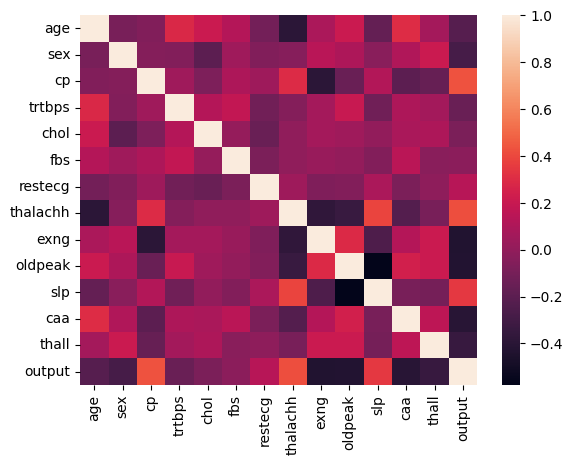

In [12]:
display(df.corr())
sns.heatmap(df.corr())

> There are high correlations between `output` and `cp`, `thalachh` and `slp`.

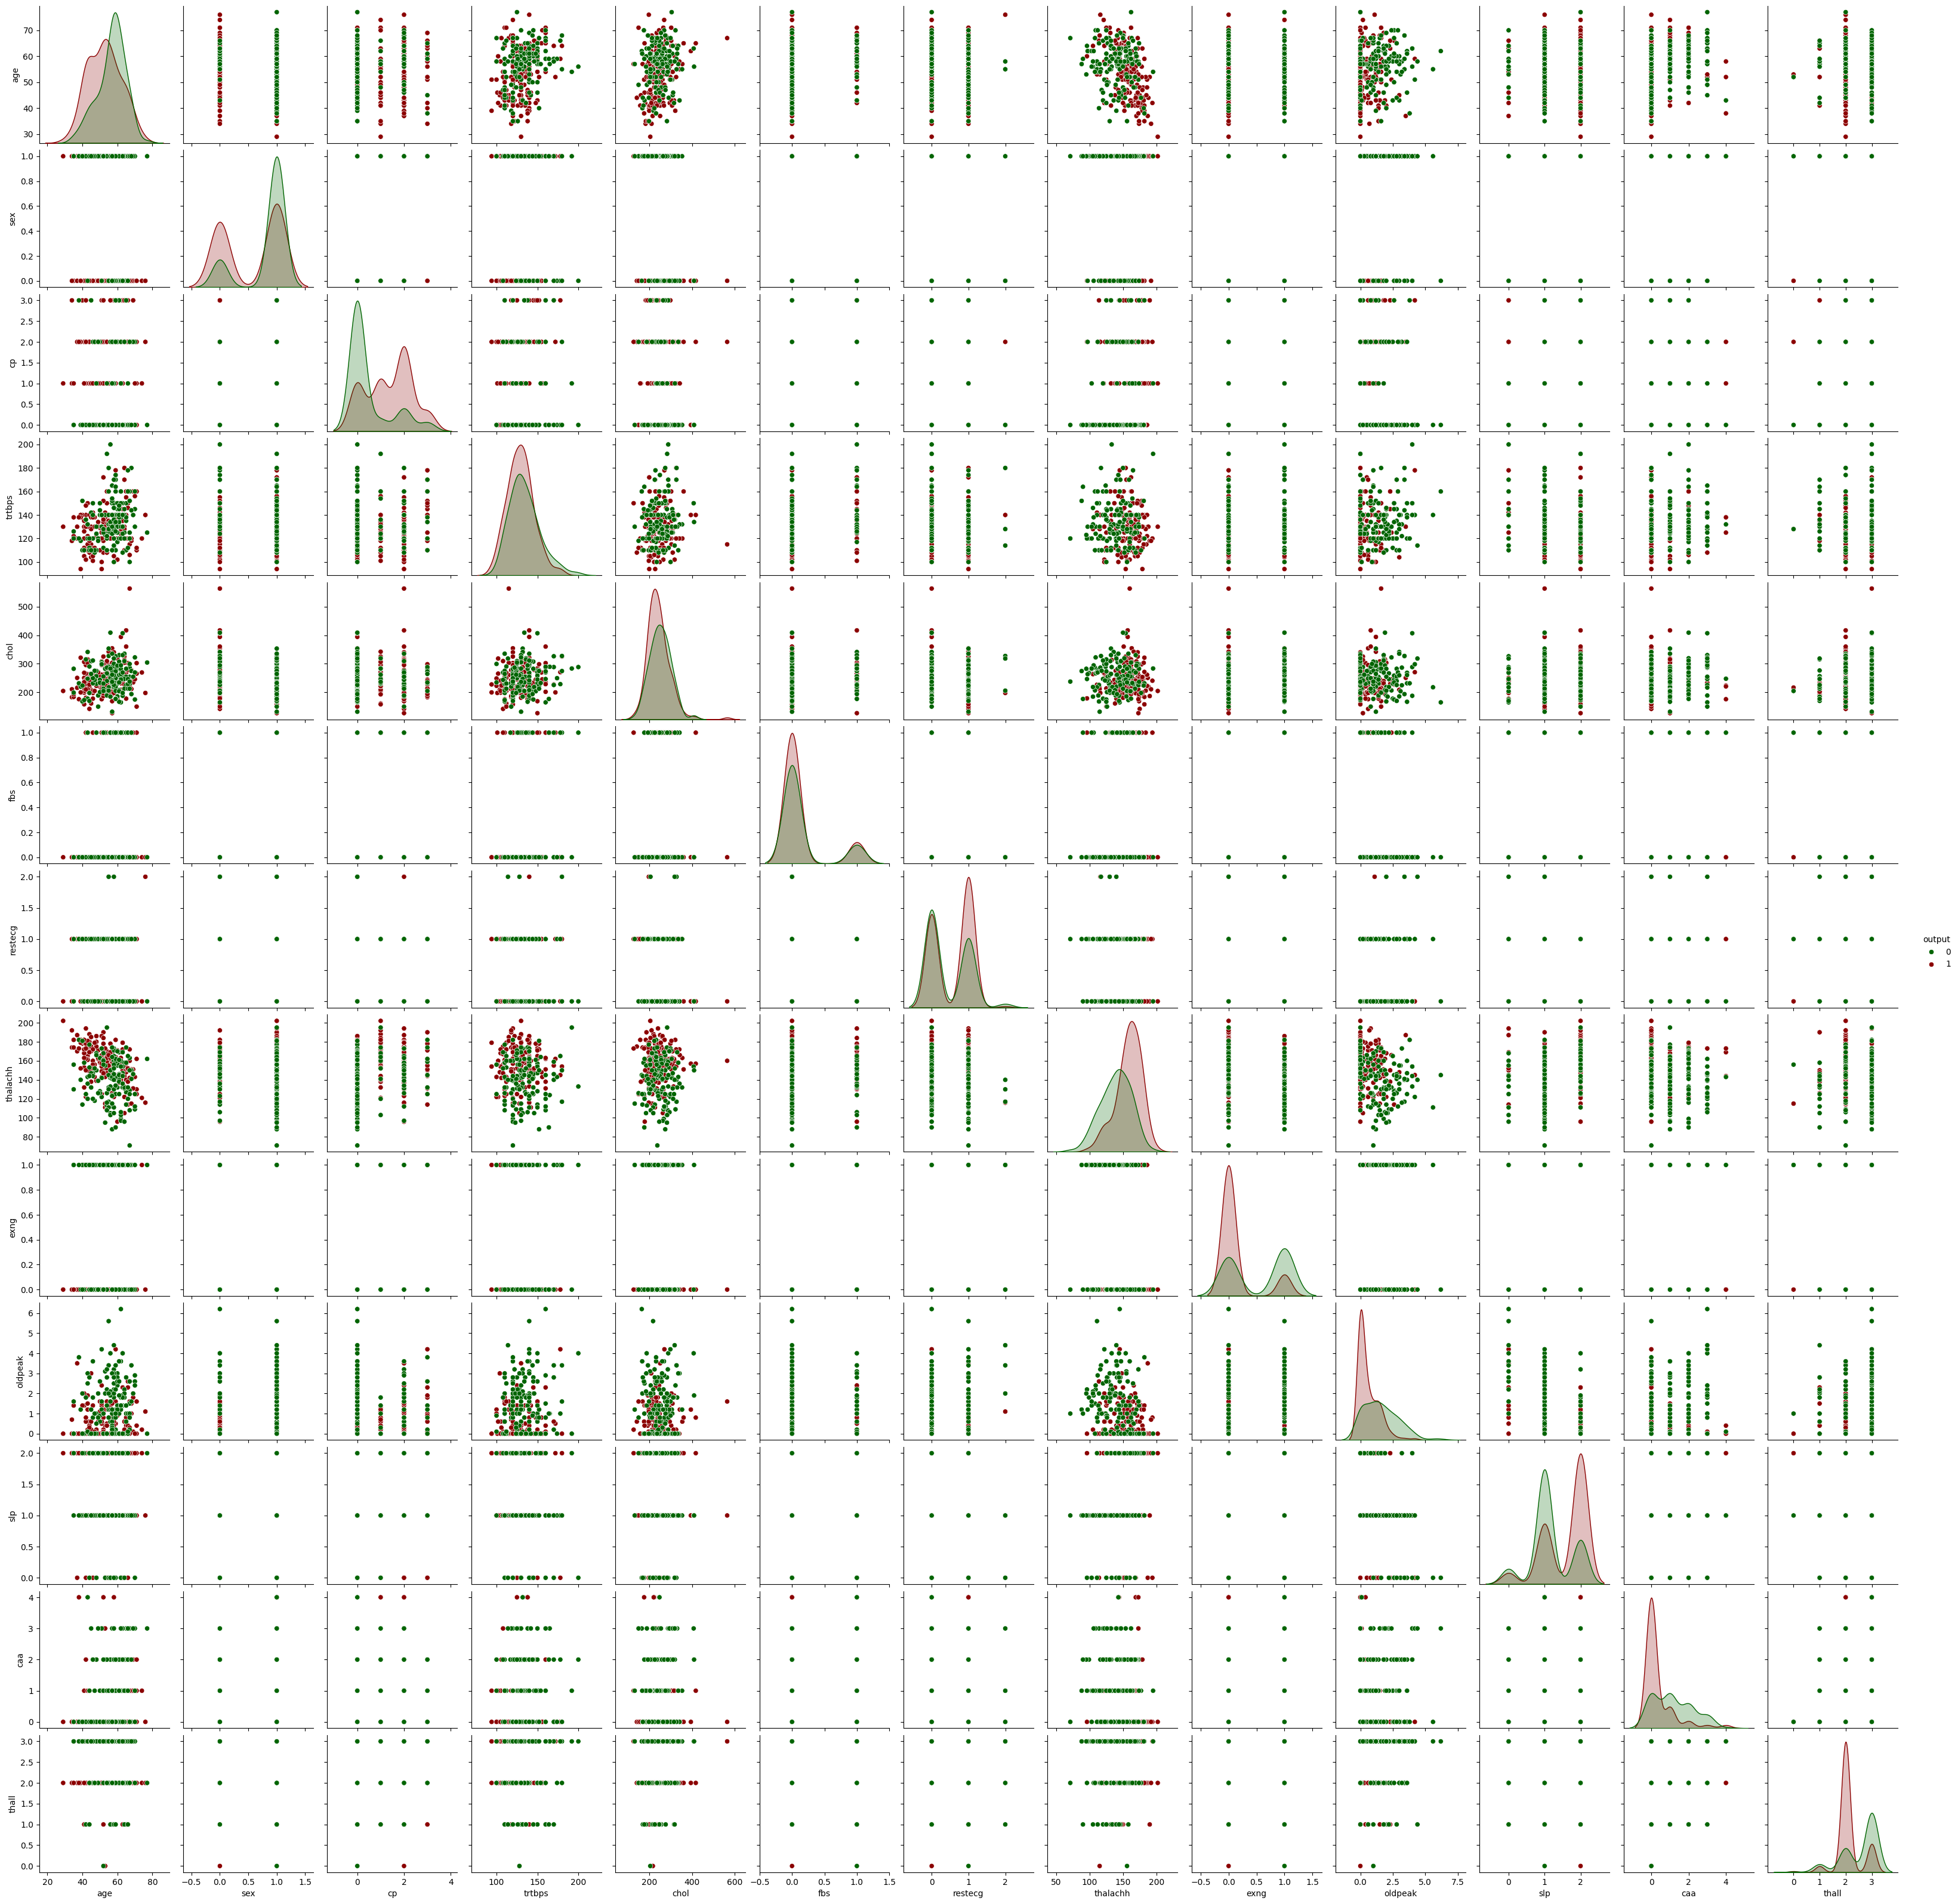

In [51]:
sns.pairplot(df,hue='output', palette=['darkgreen', 'darkred'])
plt.show()


- Object with `cp` = 2 have higher chances of heart attack.
- Object with `cp` = 0 have lower chances of heart attack.
- Object with higher `thalachh` (Maximum heart rate achieve) have higher chances of heart attack.
- Object with `exng` = 0 have higher chance of heart attack.
- Object with lower `oldpeak` (Previous peak) have higher chances of heart attack.
- Object with `slp` (Slope) = 2 have higher chances of heart attack.
- Object with `slp` (Slope) = 1 have lower chances of heart attack.
- Object with `caa` = 0 have high chance of heart attack.
- Object with `thall` = 2 have much higher chance of heart attack.

1    164
0    138
Name: output, dtype: int64


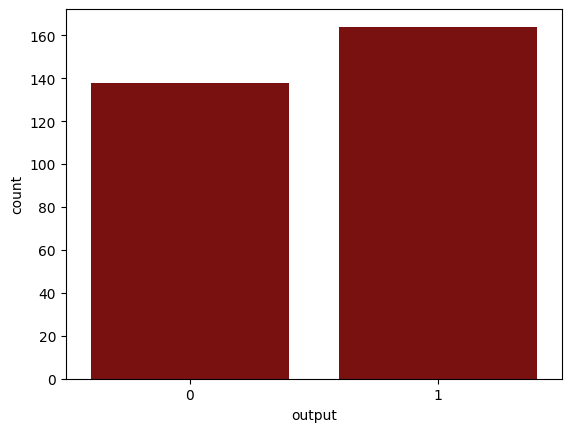

In [37]:
x = (df.output.value_counts())
print(x)
p = sns.countplot(data=df, x="output", color="darkred")
plt.show()

## 2.1 Category Features

In [21]:
category_features

['sex', 'cp', 'fbs', 'restecg', 'slp', 'caa', 'thall', 'exng']

### 2.1.1 `sex`

1    206
0     96
Name: sex, dtype: int64


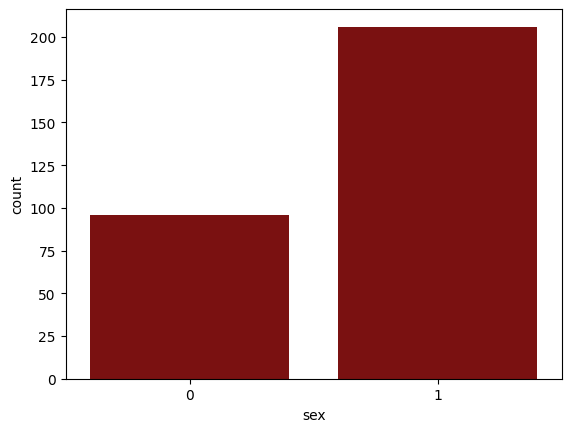

<AxesSubplot: xlabel='output', ylabel='sex'>

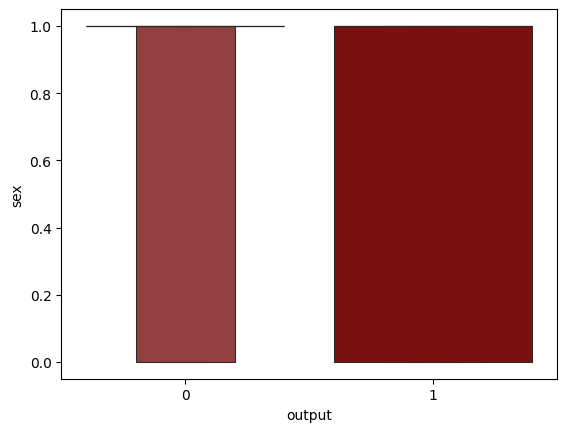

In [5]:
x = (df.sex.value_counts())
print(x)
p = sns.countplot(data=df, x="sex", color="darkred")
plt.show()

> Objects having sex 1 are more than twice the objects having sex 0

### 2.1.2 `cp`

0    143
2     86
1     50
3     23
Name: cp, dtype: int64


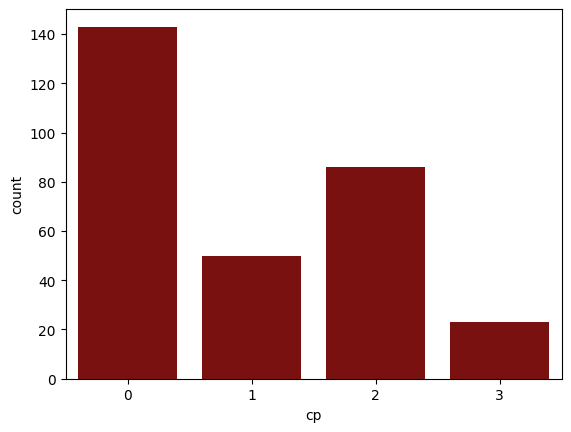

In [8]:
x = (df.cp.value_counts())
print(x)
p = sns.countplot(data=df, x="cp", color="darkred")
plt.show()

> Objects of cp 0 have the largest count, cp 3 have the lowest count

### 2.1.3 `fbs`

0    257
1     45
Name: fbs, dtype: int64


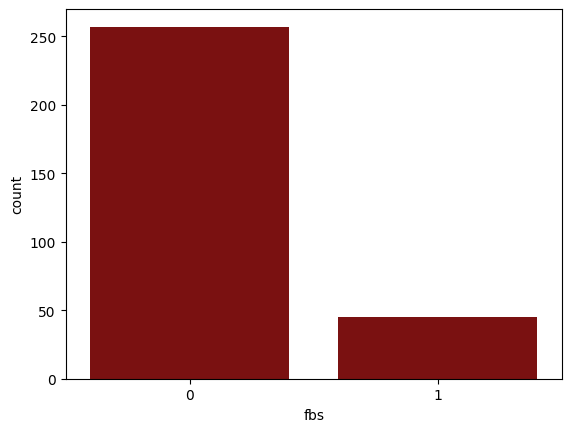

In [25]:
x = (df.fbs.value_counts())
print(x)
p = sns.countplot(data=df, x="fbs", color="darkred")
plt.show()

> Objects having fbs 0 are more than four times the objects having fbs 1

### 2.1.4 `restecg`

1    151
0    147
2      4
Name: restecg, dtype: int64


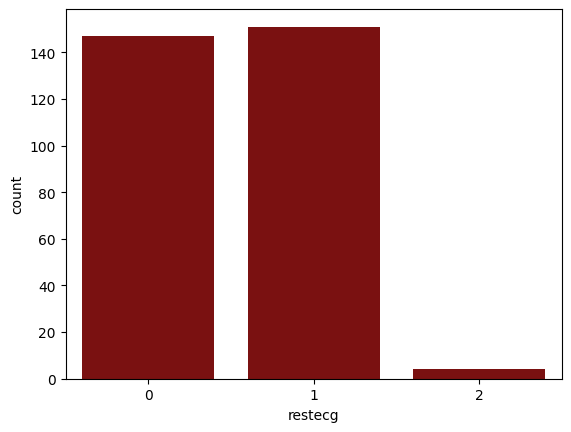

In [26]:
x = (df.restecg.value_counts())
print(x)
p = sns.countplot(data=df, x="restecg", color="darkred")
plt.show()

> restecg-0 and restecg-1 have almost the same count, restecg-2 have the lowest count
> restecg-2 is almost negligible

### 2.1.5 `slp`

2    141
1    140
0     21
Name: slp, dtype: int64


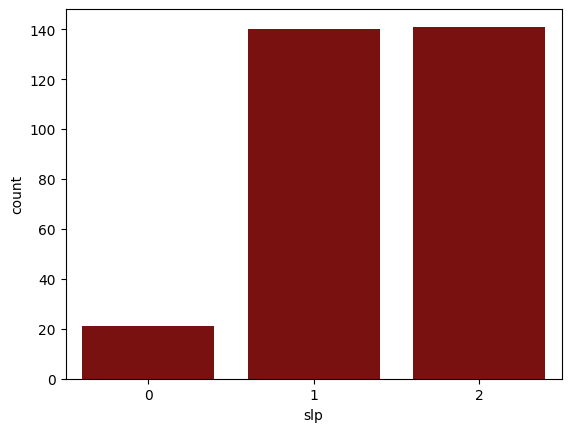

In [28]:
x = (df.slp.value_counts())
print(x)
p = sns.countplot(data=df, x="slp", color="darkred")
plt.show()

> slp-1 and slp-2 have almost the same count, slp-0 have the lowest count

### 2.1.6 `caa`

0    175
1     65
2     38
3     20
4      4
Name: caa, dtype: int64


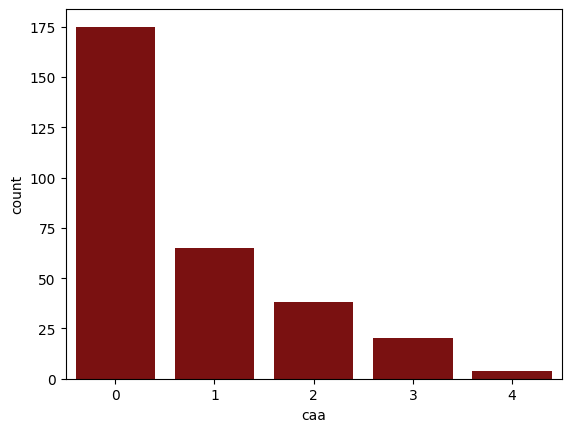

In [29]:
x = (df.caa.value_counts())
print(x)
p = sns.countplot(data=df, x="caa", color="darkred")
plt.show()

> caa-0 has the largest count, caa-4 has the lowest count

### 2.1.7 `thall`

2    165
3    117
1     18
0      2
Name: thall, dtype: int64


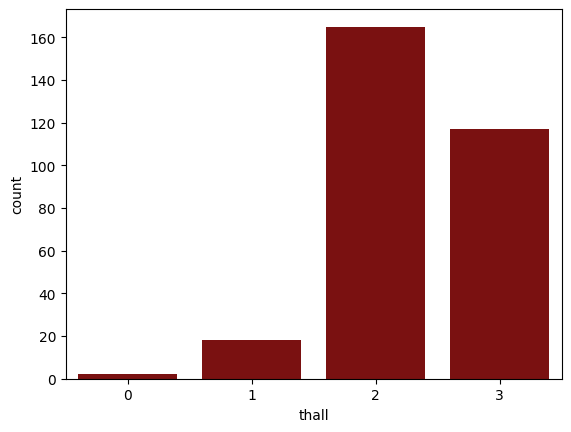

In [30]:
x = (df.thall.value_counts())
print(x)
p = sns.countplot(data=df, x="thall", color="darkred")
plt.show()

> thall-2 has the largest count, thall-0 and thall-1 have the lowest count

### 2.1.8 `exng`

0    203
1     99
Name: exng, dtype: int64


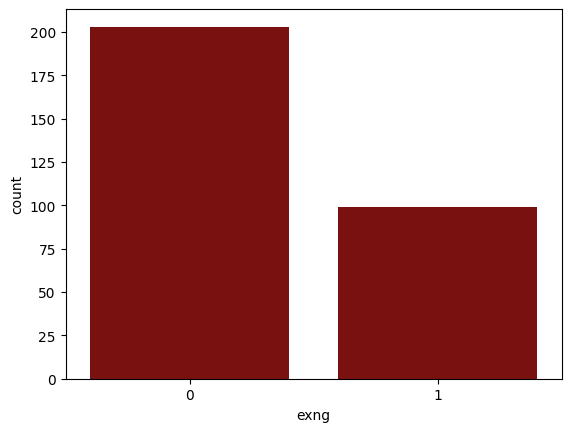

In [27]:
x = (df.exng.value_counts())
print(x)
p = sns.countplot(data=df, x="exng", color="darkred")
plt.show()

> Objects having exng 0 are more than twice the objects having exng 1

## 2.2 Numeric Features

In [31]:
numeric_features

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

### 2.2.1 `age`

<Figure size 1000x1000 with 0 Axes>

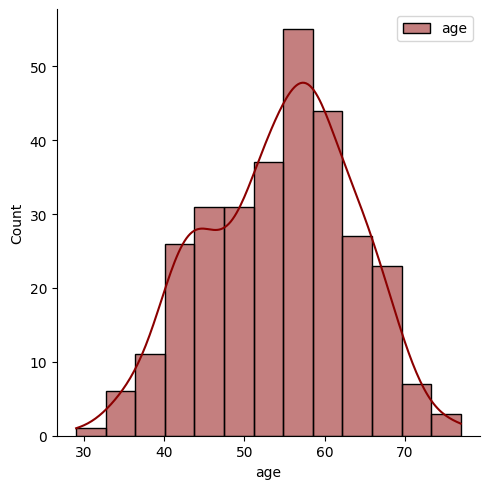

In [32]:
plt.figure(figsize=(10,10))
sns.displot(df.age, color="darkred", label="age", kde= True)
plt.legend()

> age group 55-60 has the largest count

### 2.2.2 `trtbps`

<Figure size 1000x1000 with 0 Axes>

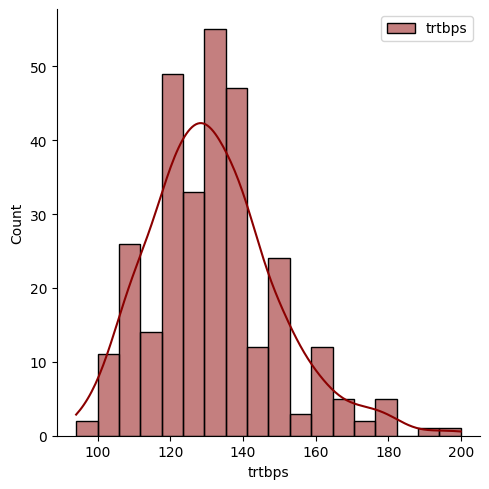

In [33]:
plt.figure(figsize=(10,10))
sns.displot(df.trtbps, color="darkred", label="trtbps", kde= True)
plt.legend()

> trtbps range 120-140 has the largest count

### 2.2.3 `chol`

<Figure size 1000x1000 with 0 Axes>

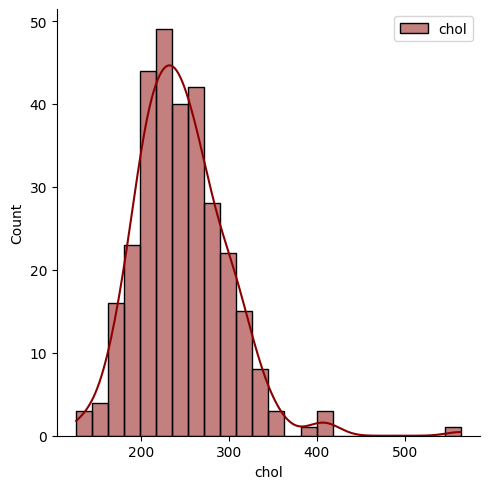

In [34]:
plt.figure(figsize=(10,10))
sns.displot(df.chol, color="darkred", label="chol", kde= True)
plt.legend()

> chol range 200-280 has the largest count

### 2.2.4 `thalachh`

<Figure size 1000x1000 with 0 Axes>

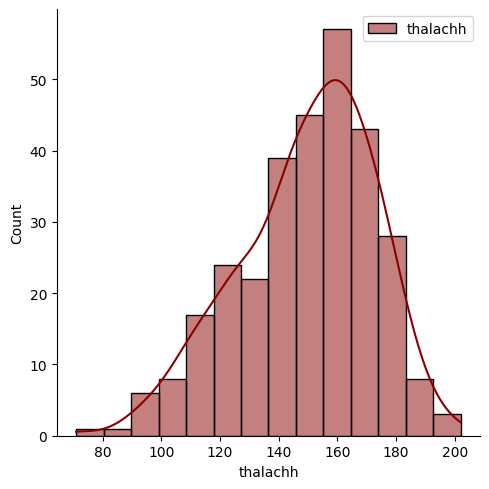

In [35]:
plt.figure(figsize=(10,10))
sns.displot(df.thalachh, color="darkred", label="thalachh", kde= True)
plt.legend()

> thalachh range 140-170 has the largest count

### 2.2.5 `oldpeak`

<Figure size 1000x1000 with 0 Axes>

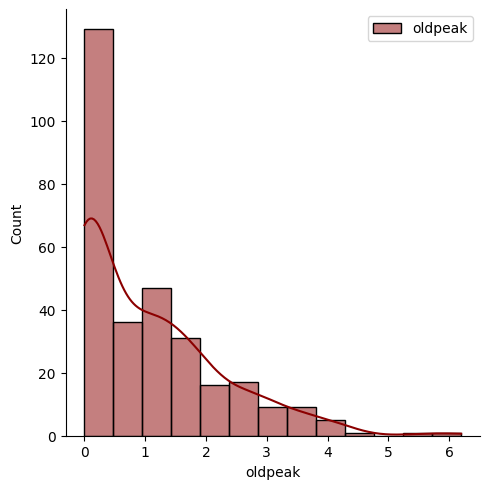

In [36]:
plt.figure(figsize=(10,10))
sns.displot(df.oldpeak, color="darkred", label="oldpeak", kde= True)
plt.legend()

> oldpeak range 0-1 has the largest count

# 3. Data preprocessing

In [3]:
# Remove duplicates
df.drop_duplicates(keep='first',inplace=True)
print('After clean: Number of records:',df.shape[0], '\nNumber of attributes:',df.shape[1])

# perform one hot encoding for category
df[c_f] = df[c_f].astype('category')
df = pd.get_dummies(df, drop_first = True)
print('After one hot encoding: Number of records:',df.shape[0], '\nNumber of attributes:',df.shape[1])

X = df.iloc[:, :-1].values # input
y = df.iloc[:, -1].values # gt
X,y

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=40)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

df.head()

After clean: Number of records: 302 
Number of attributes: 14
After one hot encoding: Number of records: 302 
Number of attributes: 23
Train set: (241, 22) (241,)
Test set: (61, 22) (61,)
Train set: (241, 22) (241,)
Test set: (61, 22) (61,)


,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


# 4. Prediction Models

## 4.1 Classificaiton Based

In [15]:
modelList = []
modelNameList = []

# Logistic Regression
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)
modelList.append(modelLR)
modelNameList.append("Logistic Regression")
predictedLR=modelLR.predict(X_test)

print ("Logistic Acc: ", accuracy_score(y_test, predictedLR)*100, "%")

# SVM
modelSVM = SVC()
modelSVM.fit(X_train, y_train)
modelList.append(modelSVM)
modelNameList.append("SVM")
predictedSVM = modelSVM.predict(X_test)

print("SVM Acc: ", accuracy_score(y_test, predictedSVM)*100, "%")

# kNN
modelKNN = KNeighborsClassifier(n_neighbors = 5)  
modelKNN.fit(X_train, y_train)
modelList.append(modelKNN)
modelNameList.append("kNN")
predictedKNN = modelKNN.predict(X_test)

print("KNN Acc: ", accuracy_score(y_test, predictedKNN.round())*100, "%")

# Gaussian Naive Bayes
modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)
modelList.append(modelGNB)
modelNameList.append("Gaussian Naive Bayes")
predictedGNB = modelGNB.predict(X_test)

print("Gaussian Naive Bayes Acc: ", accuracy_score(y_test, predictedGNB)*100, "%")


# Decision Tree
modelDT = DecisionTreeClassifier(random_state = 42)
modelDT.fit(X_train, y_train)
modelList.append(modelDT)
modelNameList.append("Decision Tree")
predictedDT = modelDT.predict(X_test)

print("Decision Tree Acc ", accuracy_score(y_test, predictedDT))

# Random Forest
modelRF = RandomForestClassifier(n_estimators = 3, random_state = 20)  
modelRF.fit(X_train, y_train)  
modelList.append(modelRF)
modelNameList.append("Random Forest")
predictedRF = modelRF.predict(X_test)

print("The accuracy of Random Forest is : ", accuracy_score(y_test, predictedRF.round())*100, "%")

# X Gradient Boosting
model = xgb.XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)
modelList.append(model)
modelNameList.append("X Gradient Boosting")
predicted = model.predict(X_test)
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")

Logistic Acc:  100.0 %
SVM Acc:  95.0 %
KNN Acc:  95.0 %
Gaussian Naive Bayes Acc:  100.0 %
Decision Tree Acc  0.95
The accuracy of Random Forest is :  100.0 %
The accuracy of X Gradient Boosting is :  100.0 %


### kNN & RF Optimization

Accuracy using K Nearest Neighbors is: 95.0 % with K value:  5


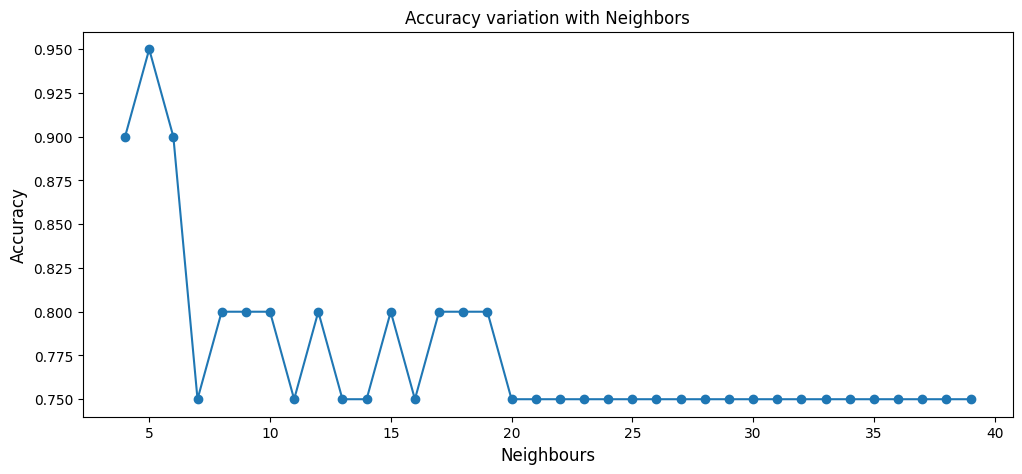

In [13]:
accList = []
maxAcc = 0
maxIndex = 0
bestPredict = 0
best_predict = 0
n = 40
for i in range (4, n):
    modelKNN = KNeighborsClassifier(n_neighbors = i)
    modelKNN.fit(X_train, y_train)
    predict = modelKNN.predict(X_test)
    acu = accuracy_score(predict, y_test)
    accList.append(acu)
    if maxAcc < acu :
        maxAcc = acu
        maxIndex = i
        bestPredict = predict

plt.figure(figsize = (12,5))
plt.plot(range (4, n), accList, marker = 'o')
plt.xlabel('Neighbours', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy variation with Neighbors', size = 12)
print("Accuracy using K Nearest Neighbors is: {} %".format(maxAcc*100), "with K value: ", maxIndex)

Accuracy using n_estimators is: 100.0 % with n_estimators =  3


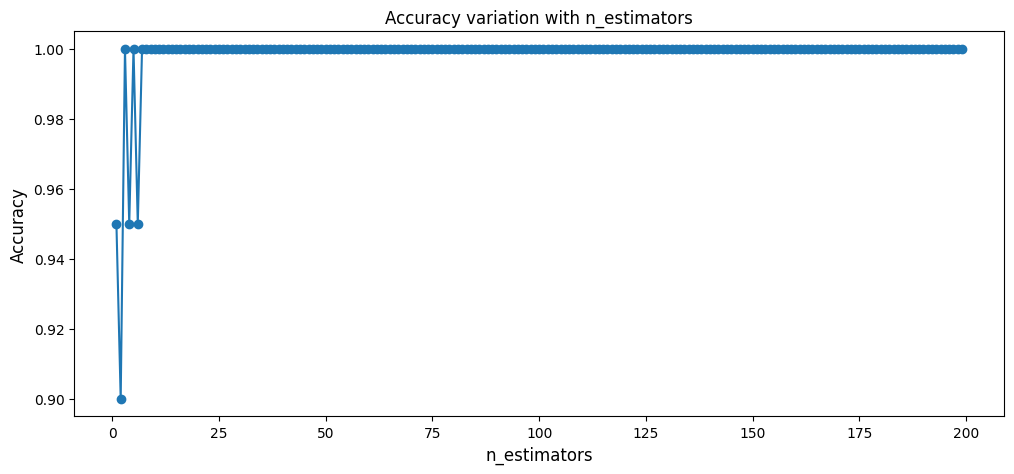

In [14]:
# Random Forest Optimization
accList = []
maxAcc = 0
maxIndex = 0
bestPredict = 0
best_predict = 0
for i in range (1, 200):
    modelRF = RandomForestClassifier(n_estimators = i, random_state = 20)  
    modelRF.fit(X_train, y_train)  
    predictedRF = modelRF.predict(X_test)
    acu = accuracy_score(predictedRF.round(), y_test)
    accList.append(acu)
    if maxAcc < acu:
        maxAcc = acu
        maxIndex = i
        bestPredict = predict

plt.figure(figsize = (12,5))
plt.plot(range (1, 200), accList, marker = 'o')
plt.xlabel('n_estimators', size = 12)
plt.ylabel('Accuracy', size = 12)
plt.title('Accuracy variation with n_estimators', size = 12)
print("Accuracy using n_estimators is: {} %".format(maxAcc*100), "with n_estimators = ", maxIndex)

### K-Fold Cross Validation

Reference:

https://www.kaggle.com/code/licgsg/heart-attack-analysis-python

/home/physics/anaconda3/envs/dmdw/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/physics/anaconda3/envs/dmdw/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

,accuracy
Logistic Regression,0.946667
SVM,0.595556
kNN,0.646667
Gaussian Naive Bayes,0.917778
Decision Tree,0.938889
Random Forest,0.867778
X Gradient Boosting,0.957778


Text(0, 0.5, 'cv_score')

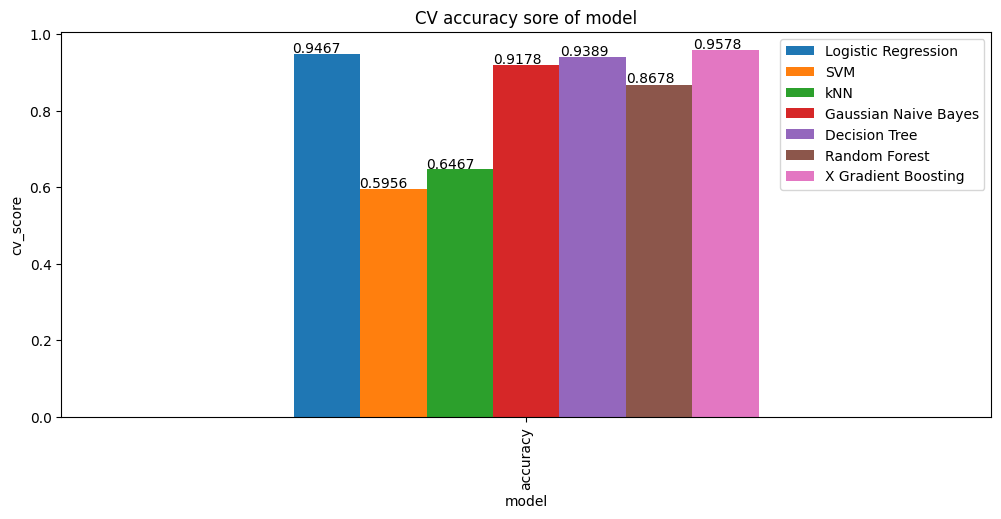

In [16]:
def get_cv_score(method):
    cv_score_avg=[]
    for model in modelList:
        cv_result = cross_val_score(model,X,y,cv=10,scoring=method)
        cv_score_avg.append(np.sum(cv_result)/10)
    cv_score_avg=pd.DataFrame(data=cv_score_avg,
             index=modelNameList,
             columns=[method])
    display(cv_score_avg)
    return cv_score_avg


ax=get_cv_score("accuracy").transpose().plot(label='10-fold CV_score',kind='bar',figsize=[12,5],title='CV accuracy sore of model')
for p in ax.patches:
    ax.annotate(str(p.get_height().round(4)), (p.get_x() * 1.005, p.get_height() * 1.005))
ax.set_xlabel("model")
ax.set_ylabel("cv_score")

## 4.2 Clustering Based

/home/physics/anaconda3/envs/dmdw/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


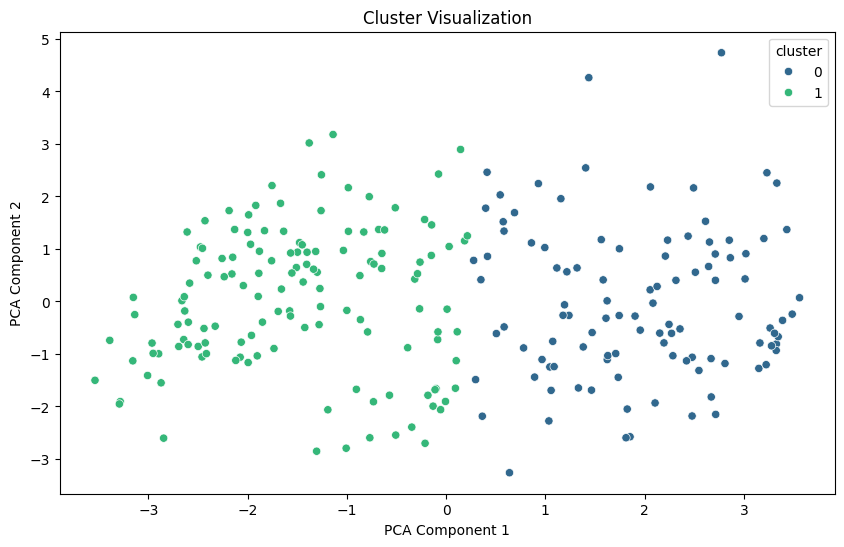

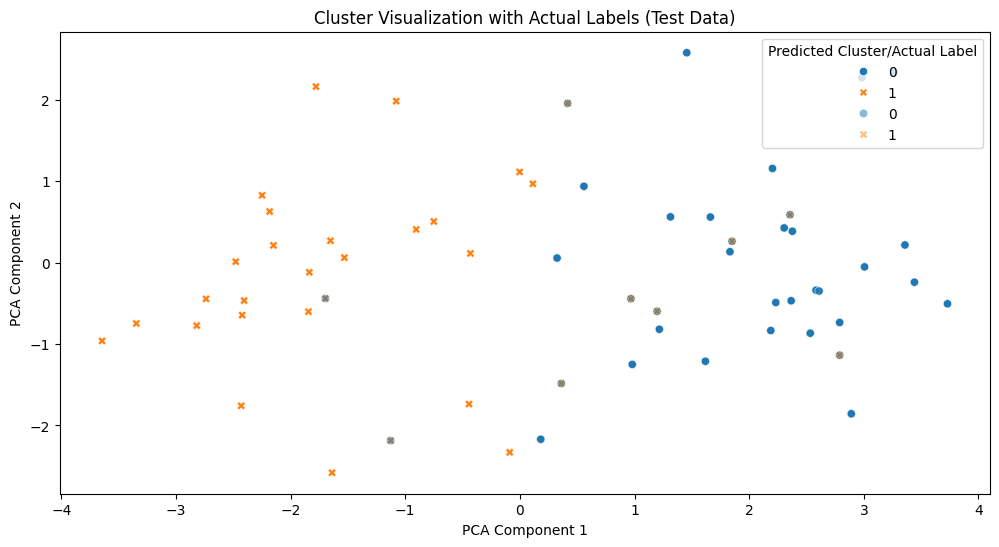

Accuracy of the Clustering-based Prediction Model: 0.8524590163934426


In [18]:
X = df.drop('output', axis=1)
y = df['output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler and PCA on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Apply KMeans clustering on the transformed training data
optimal_clusters = 2  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
train_clusters = kmeans.fit_predict(X_train_pca)

# Create a new DataFrame for training data with clusters
df_train = pd.DataFrame(X_train, columns=X.columns)
df_train['cluster'] = train_clusters
df_train['output'] = y_train.reset_index(drop=True)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=df_train['cluster'], palette='viridis')
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Transform the test data
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

# Predict clusters for the test data
test_clusters = kmeans.predict(X_test_pca)

# Visualize the predicted clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=test_clusters, style=test_clusters, markers=['o', 'X'], legend='brief')
plt.title('Predicted Clusters (Test Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_test, style=y_test, markers=['o', 'X'], legend='brief', alpha=0.5)
plt.title('Cluster Visualization with Actual Labels (Test Data)')
plt.legend(title='Predicted Cluster/Actual Label', loc='upper right')
plt.show()

# Calculate accuracy
accuracy = accuracy_score(y_test, test_clusters)
print("Accuracy of the Clustering-based Prediction Model:", accuracy)


# 5 Association Rule Mining

References:

https://www.kaggle.com/code/mervetorkan/association-rules-with-python

In [9]:
# transform the dataset
data_rule_mining = pd.read_csv("../kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
for i in ["age","trtbps","chol","thalachh","oldpeak"]:
    data_rule_mining[i] = pd.cut(data_rule_mining[i], 3)
    data_rule_mining[i] = i+data_rule_mining[i].astype(str)
for i in ['sex','exng','caa','cp','fbs','restecg','slp','thall','output']:
    data_rule_mining[i] = pd.cut(data_rule_mining[i], bins=[-1,0, 1, 2, 3, 4],
                     labels=[i+"-0", i+"-1", i+"-2", i+"-3", i+"-4"])
# create the tranactions list
transactions = []
for i in range(0, len(data_rule_mining)):
    transactions.append([str(data_rule_mining.values[i, j]) for j in range(0, 14)])
    

rules = apriori(transactions,min_support=0.25,min_confidence = 0.7,min_length = 3)
results = list(rules)

# results = pd.DataFrame(results)
# display(results.head())
# results_output = results[results['items'].str.contains(r'output-1', na = False, regex=False)]
# results_output.sort_values(by=['support'],ascending=False).head(10)

rules_data = []

for rule in results:
    for ordered_statistic in rule.ordered_statistics:
        if 'output-1' in str(ordered_statistic.items_add):
            rules_data.append({
                'rule': str(ordered_statistic.items_base) + " -> " + str(ordered_statistic.items_add),
                'support': rule.support,
                'confidence': ordered_statistic.confidence
            })

rules_df = pd.DataFrame(rules_data)
rules_df.sort_values(by=['support'], ascending=False, inplace=True)

# Display the top 10 rules
pd.set_option('display.max_colwidth', None)
rules_df.head(10)


,rule,support,confidence
15,"frozenset({'oldpeak(-0.0062, 2.067]', 'exng-0'}) -> frozenset({'output-1'})",0.448845,0.743169
0,frozenset({'caa-0'}) -> frozenset({'output-1'}),0.429043,0.742857
3,frozenset({'thall-2'}) -> frozenset({'output-1'}),0.429043,0.783133
27,"frozenset({'thall-2'}) -> frozenset({'output-1', 'oldpeak(-0.0062, 2.067]'})",0.415842,0.759036
28,"frozenset({'oldpeak(-0.0062, 2.067]', 'thall-2'}) -> frozenset({'output-1'})",0.415842,0.823529
7,"frozenset({'caa-0'}) -> frozenset({'output-1', 'oldpeak(-0.0062, 2.067]'})",0.405941,0.702857
8,"frozenset({'caa-0', 'oldpeak(-0.0062, 2.067]'}) -> frozenset({'output-1'})",0.405941,0.788462
64,"frozenset({'fbs-0', 'oldpeak(-0.0062, 2.067]', 'exng-0'}) -> frozenset({'output-1'})",0.386139,0.740506
6,"frozenset({'fbs-0', 'caa-0'}) -> frozenset({'output-1'})",0.379538,0.741935
19,"frozenset({'thall-2', 'exng-0'}) -> frozenset({'output-1'})",0.376238,0.844444


# Further Exploration

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


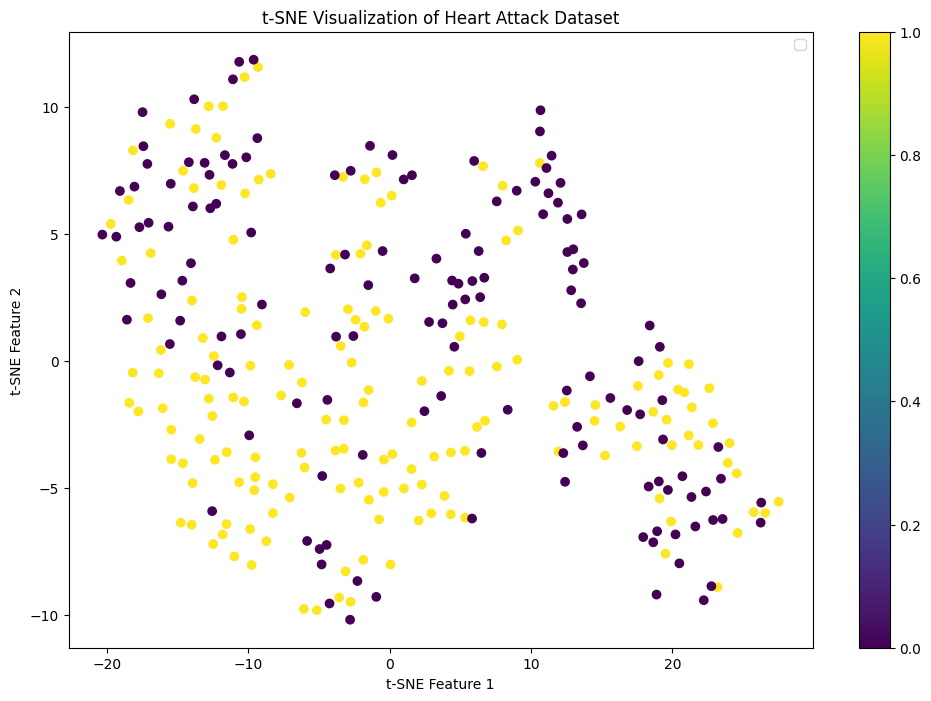

In [30]:
X = df.drop('output', axis=1)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df['output'], cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Heart Attack Dataset')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()


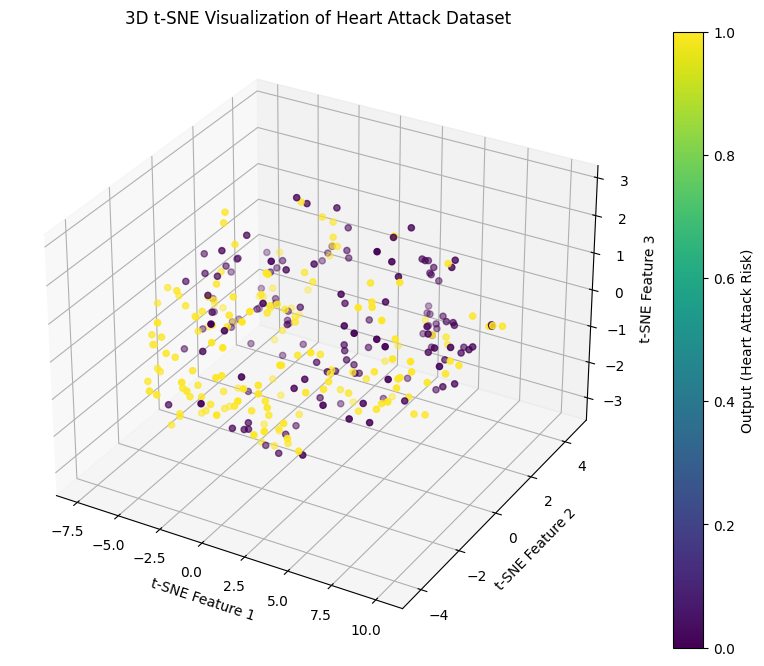

In [150]:
X = df.drop('output', axis=1)

# Apply t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualize the Results in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=df['output'], cmap='viridis')

# Adding color bar to show the target variable
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Output (Heart Attack Risk)')

ax.set_title('3D t-SNE Visualization of Heart Attack Dataset')
ax.set_xlabel('t-SNE Feature 1')
ax.set_ylabel('t-SNE Feature 2')
ax.set_zlabel('t-SNE Feature 3')
plt.show()

1. May first cluster the data into different groups and then use DT in each groups;

/home/physics/anaconda3/envs/dmdw/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/physics/anaconda3/envs/dmdw/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/physics/anaconda3/envs/dmdw/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/physics/anaconda3/envs/dmdw/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

Accuracy for Cluster: 1 is 0.6229508196721312
Accuracy for Cluster: 2 is 0.6885245901639344
Accuracy for Cluster: 3 is 0.6557377049180327
Accuracy for Cluster: 4 is 0.6935483870967742
Accuracy for Cluster: 5 is 0.6451612903225806
Accuracy for Cluster: 6 is 0.6984126984126984
Accuracy for Cluster: 7 is 0.6349206349206349
Accuracy for Cluster: 8 is 0.640625


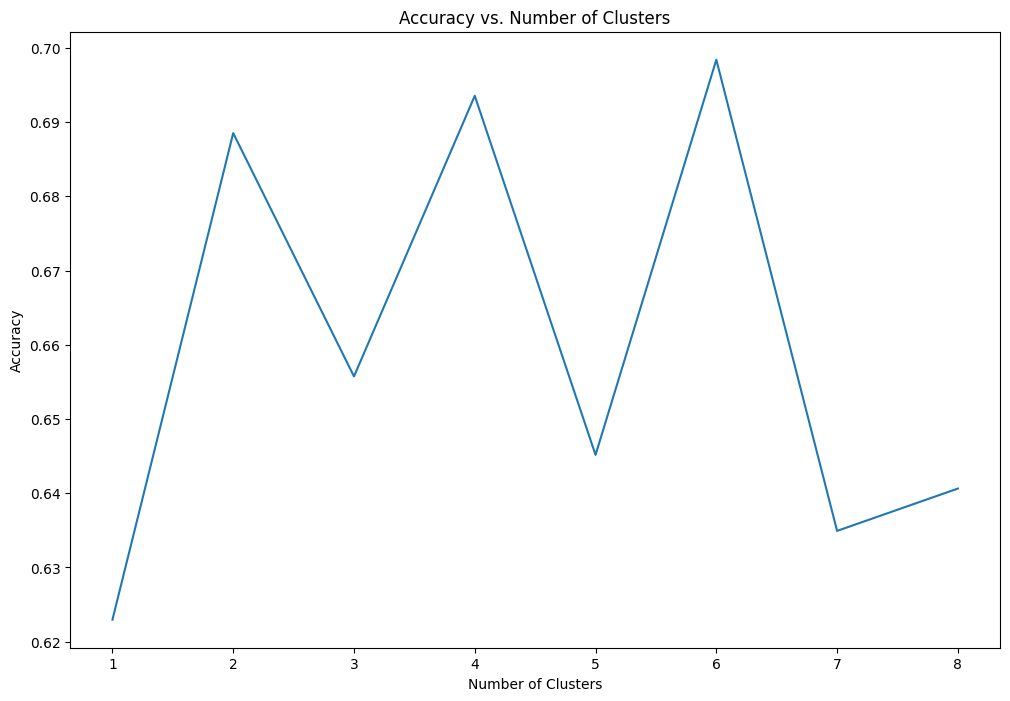

In [41]:
acc_list = []

N = 9

for n in range(1,N):

    kmeans = KMeans(n_clusters=n, random_state=0)
    clusters = kmeans.fit_predict(X)

    # Add the cluster information to your DataFrame
    df['cluster'] = clusters

    cluster_dfs = [df[df['cluster'] == k] for k in range(n)]

    total_y_test = []
    total_y_pred = []

    DTmodels = []
    for cluster_df in cluster_dfs:
        X_cluster = cluster_df.drop(['output', 'cluster'], axis=1)
        y_cluster = cluster_df['output']
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=40)
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Train a Decision Tree model
        dt = DecisionTreeClassifier(random_state=42)
        dt.fit(X_train, y_train)
        DTmodels.append(dt)
        
        total_y_test.extend(y_test)
        total_y_pred.extend(dt.predict(X_test))
        
    # Evaluate the model
    result = accuracy_score(total_y_test, total_y_pred)
    print("Accuracy for Cluster:", n, "is", result)
    acc_list.append(result)

# plot the accuracy
plt.figure(figsize=(12, 8))
plt.plot(range(1,N), acc_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Clusters')
plt.show()

2. Separate into groups, then do method
   1. sex: 0 more accurate than 1 OK
   2. age: 50-60 more accurate than <50 and >60
   3. cp: 0, not-0, both have higher accuracy OK
   4. thalachh: X
   5. exng X
   6. oldpeak: 0-2.2.067 more accurate than >2.067 OK
   7. caa: caa-0 more accurate than caa-1, caa-2, caa-3 OK
   8. thall:  X
   9. chol: not in 125-272 more accurate than in 125-272 OK